In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
diabetes_df = pd.read_csv('dataset/diabetes_data.csv')
diabetes_df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


# Exploratory Data Analysis

In [29]:
diabetes_df['Diagnosis'].value_counts()

Diagnosis
0    1127
1     752
Name: count, dtype: int64

In [30]:
diabetes_df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


<Axes: xlabel='FastingBloodSugar', ylabel='HbA1c'>

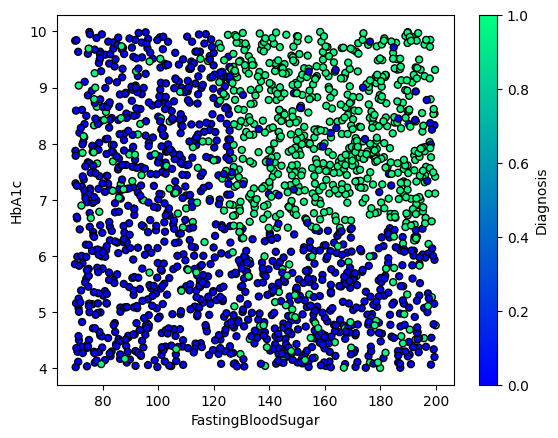

In [34]:
# Plot the data on a scatter plot
diabetes_df.plot.scatter(
    x='FastingBloodSugar', 
    y='HbA1c', 
    c='Diagnosis', 
    marker='o', 
    s=25, 
    edgecolor='k',
    colormap="winter"
)

# Define Features and Target

In [3]:
# Define the features set and drop the target column, along with confidiential columns
X = diabetes_df.copy()
X.drop(["Diagnosis", "DoctorInCharge", "PatientID"], axis=1, inplace=True)
X.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,BlurredVision,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
0,44,0,1,2,1,32.985284,1,4.499365,2.443385,4.898831,...,0,0,1,73.765109,0,0,0,1.782724,4.486980,7.211349
1,51,1,0,1,2,39.916764,0,1.578919,8.301264,8.941093,...,0,0,0,91.445753,0,0,1,3.381070,5.961705,5.024612
2,89,1,0,1,3,19.782251,0,1.177301,6.103395,7.722543,...,0,0,0,54.485744,0,0,0,2.701019,8.950821,7.034944
3,21,1,1,1,2,32.376881,1,1.714621,8.645465,4.804044,...,0,0,0,77.866758,0,0,1,1.409056,3.124769,4.717774
4,27,1,0,1,3,16.808600,0,15.462549,4.629383,2.532756,...,0,0,0,37.731808,0,0,0,1.218452,6.977741,7.887940


In [4]:
# Define the target set
y = diabetes_df["Diagnosis"].values.reshape(-1, 1)
y[:5]   

array([[1],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

# Train, Test, Split and Scaling

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
# Scale the X data by using the StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.15727032,  1.0151998 ,  1.19107236, ...,  0.48138034,
        -0.23147994, -0.81601046],
       [ 0.92070504, -0.98502778, -0.72109081, ...,  1.38868605,
         0.07435621, -1.11110197],
       [-0.57737022, -0.98502778,  0.23499077, ..., -0.47508398,
        -0.6673047 ,  1.33342076],
       ...,
       [ 1.40395513,  1.0151998 ,  0.23499077, ..., -1.06004584,
         1.18199112, -0.04920784],
       [-1.30224535,  1.0151998 ,  0.23499077, ...,  0.66936873,
         0.55021497,  1.00472701],
       [ 1.01735506, -0.98502778,  0.23499077, ..., -1.13107533,
         0.70561955, -1.0619532 ]])

In [9]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.0991799 ,  1.0151998 , -0.72109081, ..., -0.50745935,
         1.6027578 ,  1.38332241],
       [ 0.14750491, -0.98502778, -0.72109081, ..., -0.88539682,
        -0.49578921, -0.49105319],
       [ 1.64558017,  1.0151998 , -0.72109081, ..., -1.27623902,
         0.42059048, -1.68465079],
       ...,
       [-1.49554538,  1.0151998 , -0.72109081, ...,  1.39607329,
        -0.50410741,  0.99486651],
       [ 0.0991799 ,  1.0151998 , -0.72109081, ..., -1.74069915,
         0.56504575,  0.73938159],
       [ 1.40395513, -0.98502778, -0.72109081, ...,  0.91351206,
        -1.43109929, -0.10332243]])

# Create the model

In [10]:
# Create a logistic regression model
logistic_regression_model = LogisticRegression()

# Fit the model to the data
logistic_regression_model.fit(X_train_scaled, y_train)

c:\Users\lucas\anaconda3\envs\activities\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8376220053238687
Testing Data Score: 0.8470744680851063


In [12]:
# Find R2 Score
print(f"R2 Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

R2 Score: 0.8470744680851063


# Predictions of Diagnosis

In [37]:
# Generate Predictions from the model
predictions = logistic_regression_model.predict(X_train_scaled)

# Ensure y_train is 1-dimensional
y_train_flattened = y_train.flatten()

results_df = pd.DataFrame({"Predictions": predictions, "Actual": y_train_flattened})


In [43]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test_scaled)

y_test_flattened = y_test.flatten()

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Real Values": y_test_flattened})

In [44]:
# Display the results DataFrame
results_df

,Testing Data Predictions,Testing Data Real Values
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
747,0,0
748,1,1
749,0,0
750,0,0


In [45]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test_flattened, testing_predictions)

0.8470744680851063

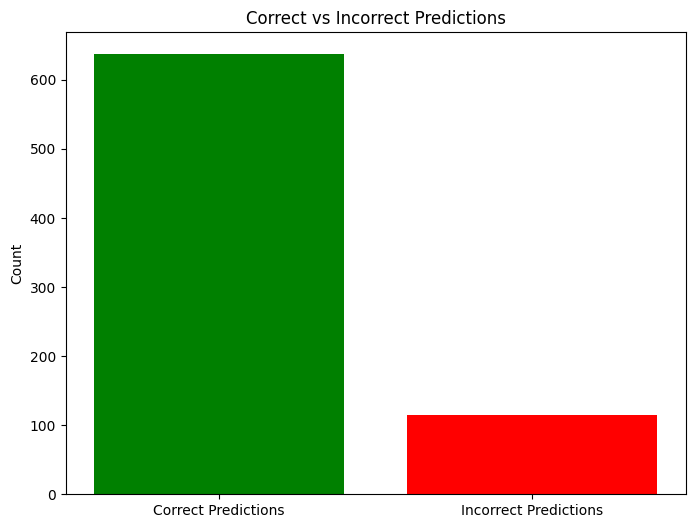

In [48]:
correct = (testing_predictions == y_test_flattened)
incorrect = ~correct

correct_counts = correct.sum()
incorrect_counts = incorrect.sum()

plt.figure(figsize=(8, 6))
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct_counts, incorrect_counts], color=['green', 'red'])
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.show()

# ROC Curve

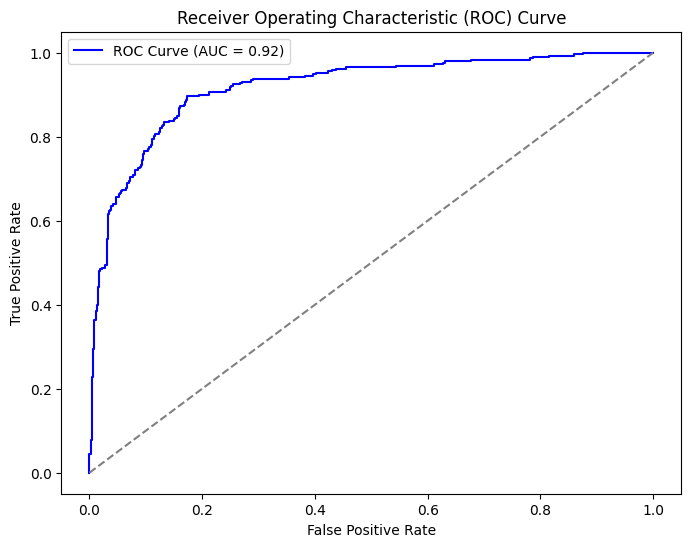

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test_flattened, y_prob)
auc_score = roc_auc_score(y_test_flattened, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Interpretation

- The ROC Curve being in the upper half, especially close to the top left corner, indicates that the model is performing well.
- The model has high sensitivity (True Positive Rate, TPR) with a low False Positive Rate.
- This means that the model is correctly identifying a large proportion of the actual positive cases (high TPR) while misclassifying very few of the negative cases as positive
(low FPR)

An ROC (Receiver Operating Characteristic) curve and the associated AUC (Area Under the Curve) are key metrics used to evaluate the performance of a binary classification model. Here’s how to interpret an ROC curve with an AUC of 0.92:

ROC Curve Overview:
ROC Curve: The ROC curve plots the True Positive Rate (TPR or sensitivity) against the False Positive Rate (FPR) at various threshold settings.
True Positive Rate (TPR): Also known as recall or sensitivity, it is the ratio of correctly predicted positive observations to all actual positives.
False Positive Rate (FPR): The ratio of incorrectly predicted positive observations to all actual negatives.
AUC Interpretation:
AUC (Area Under the Curve): The AUC represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.
Range: AUC values range from 0 to 1, where:
AUC = 0.5: The model is no better than random guessing.
AUC < 0.5: The model is performing worse than random guessing (likely an indication of a problem in the model or data).
AUC = 1.0: The model is perfectly distinguishing between the two classes, with no false positives or false negatives.
Interpretation of AUC = 0.92:
High AUC: An AUC of 0.92 indicates that the model has a high ability to distinguish between the positive and negative classes. Specifically, there is a 92% chance that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance.
Model Performance:
Excellent Discrimination: Typically, an AUC between 0.9 and 1.0 is considered excellent. It suggests that the model is very good at distinguishing between the two classes.
Low Error Rate: A high AUC implies a low rate of false positives and false negatives across various thresholds.
What This Tells You:
Model Strength: The model is performing very well at distinguishing between the classes. It is highly capable of predicting whether a given instance belongs to the positive class (e.g., class 1) or the negative class (e.g., class 0).
Threshold Independence: The ROC curve and AUC are independent of the decision threshold. This means the model's performance is consistently good across various thresholds, not just at one specific point.
Confidence in Predictions: The high AUC value gives you confidence that the model's predictions are reliable and that it can effectively discriminate between the two outcomes.
Considerations:
Class Imbalance: While AUC is a robust metric, in the case of imbalanced datasets (where one class significantly outnumbers the other), AUC alone might not fully capture the model's performance. In such cases, it’s also important to look at other metrics like Precision-Recall curves, Precision, Recall, and F1-score.
Business Impact: The choice of an optimal threshold should consider the specific business problem, where the cost of false positives or false negatives might differ. The AUC provides a broad overview, but decisions about threshold setting should be aligned with the domain-specific cost-benefit analysis.
In summary, an AUC of 0.92 indicates that your model is performing very well in distinguishing between the classes, and you can be confident in its predictive abilities. However, remember to consider other metrics and the specific context of your application to make informed decisions.

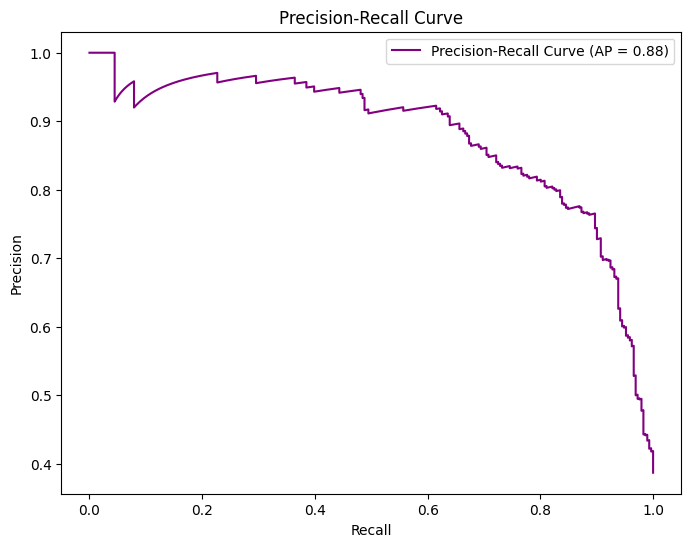

In [49]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test_flattened, y_prob)
avg_precision = average_precision_score(y_test_flattened, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Compute Correlation Coefficients

In [16]:
# Because X_train_scaled is a numpy array and X contains the original feature names
# Recreate the DataFrame with scaled features for easier correlation analysis
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

In [17]:
# Add the target column back to this DataFrame
X_train_scaled_df['Diagnosis'] = y_train

In [18]:
# Compute the correlation matrix. The .corr() method calculates the Pearson correlation coefficient between the featuers and the target variable.
corr_matrix = X_train_scaled_df.corr()

In [19]:
# Extract the correlation of each feature with the target variable 'Diagnosis'
target_corr = corr_matrix['Diagnosis'].drop('Diagnosis')

In [20]:
# Display the correlations
print("Correlation of features with the target 'Diagnosis':")
print(target_corr)

Correlation of features with the target 'Diagnosis':
Age                             -0.030688
Gender                           0.039625
Ethnicity                       -0.033980
SocioeconomicStatus              0.016731
EducationLevel                   0.019185
BMI                              0.020492
Smoking                          0.078732
AlcoholConsumption              -0.002009
PhysicalActivity                 0.025973
DietQuality                     -0.064874
SleepQuality                     0.003620
FamilyHistoryDiabetes            0.051297
GestationalDiabetes              0.005719
PolycysticOvarySyndrome          0.029336
PreviousPreDiabetes             -0.030373
Hypertension                     0.123030
SystolicBP                      -0.059920
DiastolicBP                      0.045577
FastingBloodSugar                0.461801
HbA1c                            0.413547
SerumCreatinine                  0.011027
BUNLevels                        0.018444
CholesterolTotal       

C:\Users\lucas\AppData\Local\Temp\ipykernel_23256\2037348255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')


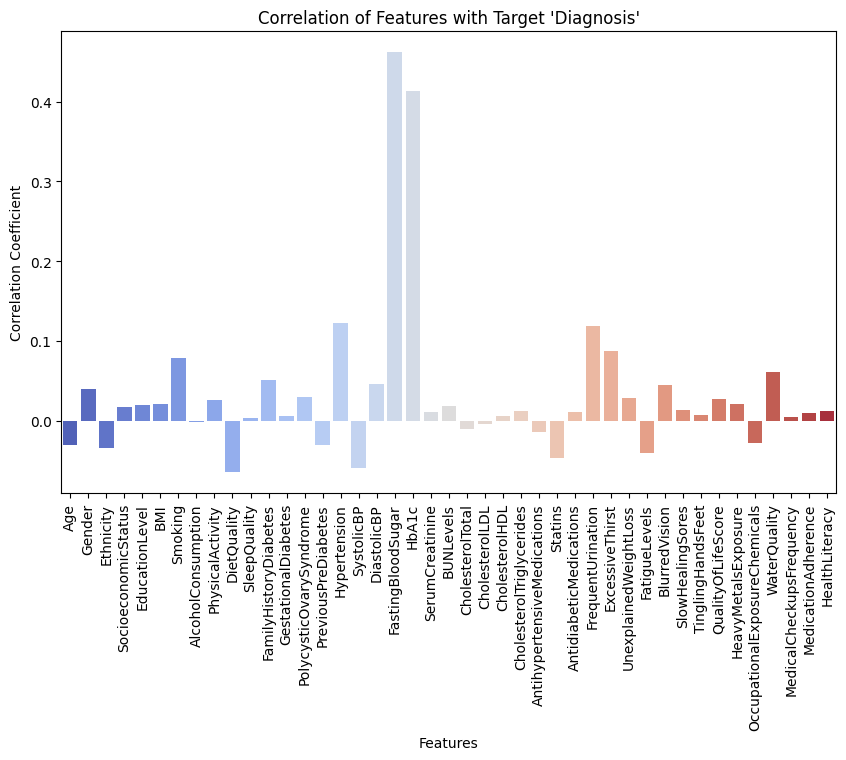

In [23]:
# Visualize the correlations using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Correlation of Features with Target 'Diagnosis'")
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

# Confusion Matrix

C:\Users\lucas\AppData\Local\Temp\ipykernel_23256\817982907.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'Negative', 'Positive'])
C:\Users\lucas\AppData\Local\Temp\ipykernel_23256\817982907.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Negative', 'Positive'])


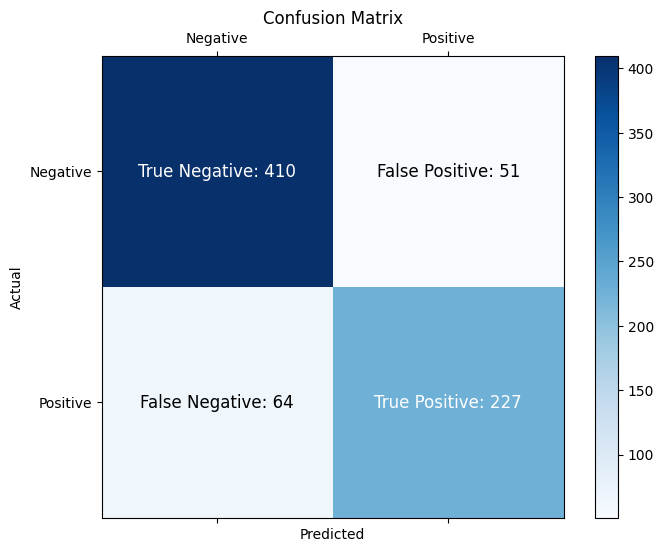

In [35]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, logistic_regression_model.predict(X_test_scaled))

# Plot the confusion matrix manually
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap='Blues')

# Add color bar
plt.colorbar(cax)

# Adding text annotations for TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

ax.text(0, 0, f'True Negative: {tn}', ha='center', va='center', color='white', fontsize=12)
ax.text(1, 0, f'False Positive: {fp}', ha='center', va='center', color='black', fontsize=12)
ax.text(0, 1, f'False Negative: {fn}', ha='center', va='center', color='black', fontsize=12)
ax.text(1, 1, f'True Positive: {tp}', ha='center', va='center', color='white', fontsize=12)

# Set x and y axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Set tick labels
ax.set_xticklabels(['', 'Negative', 'Positive'])
ax.set_yticklabels(['', 'Negative', 'Positive'])

# Title for the plot
plt.title('Confusion Matrix')
plt.show()